In [1]:
import numpy as np
import seaborn as sns 
import pandas as pd
import math
from scipy import stats as st
from matplotlib import pyplot as plt

In [54]:
def rumor_func(S_0=10e-6,k=10,l=0.5,g=0.1,n=0.2,d=0.2,
                 t=10,dt=0.0001,I=True,S=True,R=True,
                 lab_i="ignorant",lab_s="spreader",lab_r="stifler"):
    gen=math.floor(t/dt)
    rumors= np.zeros([gen,3])
    rumors[0]=[1-S_0,S_0,0]
    for i in np.arange(gen-1):
        dI=(-1)*k*rumors[i][0]*rumors[i][1]
        dS=l*k*rumors[i][0]*rumors[i][1]-k*rumors[i][1]*(g*rumors[i][1]+n*rumors[i][2])-d*rumors[i][1]
        dR=-dI-dS
        change=np.array([dI,dS,dR])
        rumors[i+1]=rumors[i]+change*dt
        x_0=np.arange(gen)*dt
    if I==True:
        sns.lineplot(y=rumors.transpose()[0],x=x_0,label=lab_i)
    if S==True:
        sns.lineplot(y=rumors.transpose()[1],x=x_0,label=lab_s)
    if R==True:
        sns.lineplot(y=rumors.transpose()[2],x=x_0,label=lab_r)

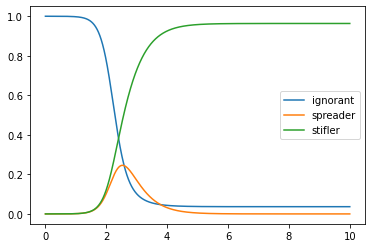

In [55]:
rumor_func()

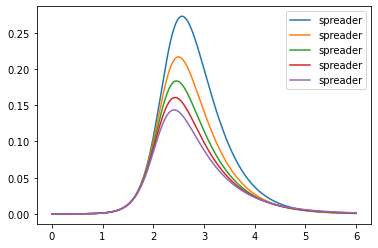

In [239]:
for g_0 in np.linspace(0,1,5):
    rumor_func(g=g_0,I=False,R=False)

In [48]:
def rumor_func_2(S_0=10e-6,k=10,l=0.5,g=0.1,n=0.2,d=0.2,a=0.1,ep=0.1,
                 t=10,dt=0.0001,I=True,S=True,R=True,
                 lab_i="ignorant",lab_s="spreader",lab_r="stifler"):
    gen=math.floor(t/dt)
    rumors= np.zeros([gen,3])
    rumors[0]=[1-S_0,S_0,0]
    for i in np.arange(gen-1):
        dI=(-1)*k*rumors[i][0]*rumors[i][1]
        #formula for rate of change of ignorants
        dS=l*k*rumors[i][0]*rumors[i][1]-k*rumors[i][1]*(g*rumors[i][1]+n*rumors[i][2])-d*rumors[i][1]+ep*k*rumors[i][1]*rumors[i][2]+a*rumors[i][2]
        #formula for rate of change of spreaders
        dR=-dI-dS
        #formula for rate of change of stiflers
        change=np.array([dI,dS,dR])
        #derivatives for each subpopulations
        rumors[i+1]=rumors[i]+change*dt
        #subpopulations for next generation using Euler's method
    #loops t/dt times
        x_0=np.arange(gen)*dt
    if I==True:
        sns.lineplot(y=rumors.transpose()[0],x=x_0,label=lab_i)
    if S==True:
        sns.lineplot(y=rumors.transpose()[1],x=x_0,label=lab_s)
    if R==True:
        sns.lineplot(y=rumors.transpose()[2],x=x_0,label=lab_r)

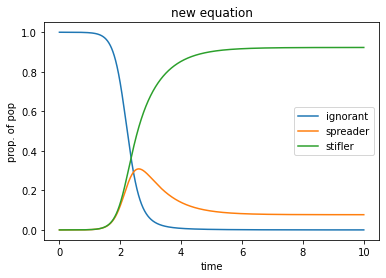

In [70]:
rumor_func_2()
plt.title("new equation")
plt.xlabel('time')
plt.ylabel('prop. of pop')
plt.savefig(path+'plot_improved_function')

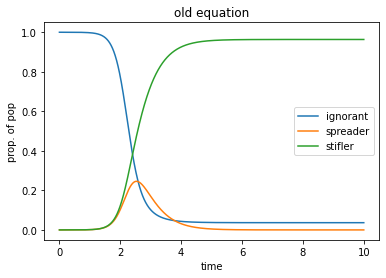

In [72]:
rumor_func(t=10)
plt.title("old equation")
plt.xlabel('time')
plt.ylabel('prop. of pop')
plt.savefig(path+'plot_old_function')

In [2]:
path = '/Users/theelusivegerbilfish/Desktop/142 Project/'

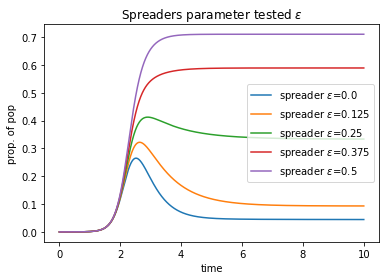

In [68]:
for i in np.linspace(0,0.5,5):
    rumor_func_2(I=False,R=False, ep=i, lab_s="spreader $\epsilon$="+str(i))
plt.title("Spreaders parameter tested $\epsilon$")
plt.xlabel('time')
plt.ylabel('prop. of pop')
plt.savefig(path+'epsilon_spreader_plot')

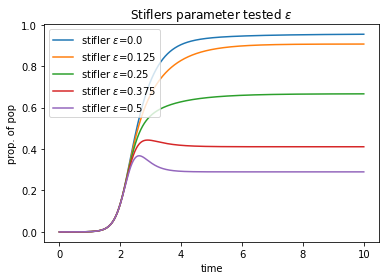

In [63]:
for i in np.linspace(0,0.5,5):
    rumor_func_2(I=False,S=False, ep=i, lab_r="stifler $\epsilon$="+str(i))
plt.title("Stiflers parameter tested $\epsilon$")
plt.xlabel('time')
plt.ylabel('prop. of pop')
plt.savefig(path+'epsilon_stifler_plot')

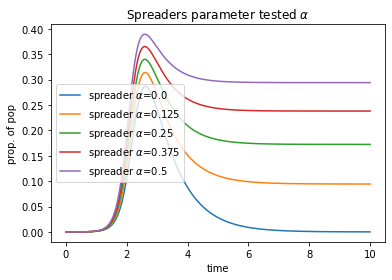

In [64]:
for i in np.linspace(0,0.5,5):
    rumor_func_2(I=False,R=False, a=i, lab_s="spreader $\\alpha$="+str(i))
plt.title("Spreaders parameter tested $\\alpha$")
plt.xlabel('time')
plt.ylabel('prop. of pop')
plt.savefig(path+'alpha_spreader_plot')

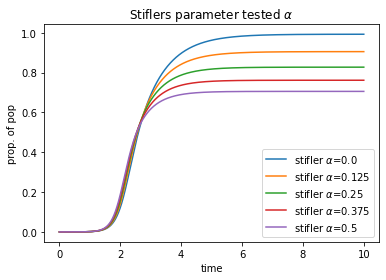

In [65]:
for i in np.linspace(0,0.5,5):
    rumor_func_2(I=False,S=False, a=i, lab_r="stifler $\\alpha$="+str(i))
plt.title("Stiflers parameter tested $\\alpha$")
plt.xlabel('time')
plt.ylabel('prop. of pop')
plt.savefig(path+'alpha_stifler_plot')

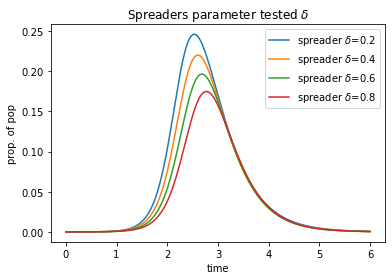

In [73]:
for i in np.linspace(0.2,0.8,4):
    rumor_func(I=False,R=False, d=i,t=6,lab_s="spreader $\delta$="+str(np.round(i,2)))
plt.title("Spreaders parameter tested $\delta$")
plt.xlabel('time')
plt.ylabel('prop. of pop')
plt.savefig(path+'delta_spreader_plot')

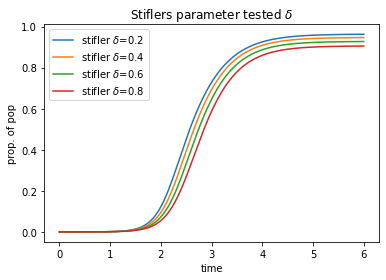

In [74]:
for i in np.linspace(0.2,0.8,4):
    rumor_func(I=False,S=False, d=i,t=6,lab_r="stifler $\delta$="+str(np.round(i,2)))
plt.title("Stiflers parameter tested $\delta$")
plt.xlabel('time')
plt.ylabel('prop. of pop')
plt.savefig(path+'delta_stifler_plot')